# Trabalho Prático 3 - Filtragem Espacial

In [1]:
from skimage.io import imread,imsave, imshow
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
import random
import math
import numpy as np

1) Crie um algoritmo que implemente filtros de convolução. O algoritmo deverá receber como parâmetros a imagem a ser processada, o filtro e o tratamento a ser feito na borda. A função, obrigatoriamente, deverá seguir a seguinte nomenclatura: convolucao(img, laplaciano, 'ignore')

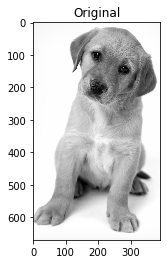

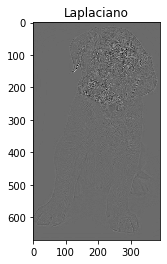

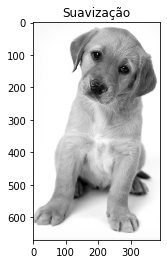

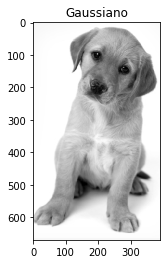

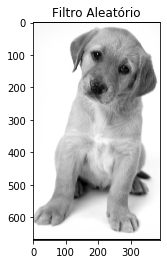

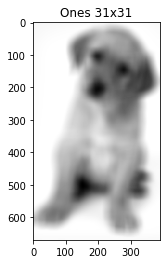

In [2]:
def ignore(imagem, filtro):
    janelas = []
    #verificar fórmula
    
    l_filtro, c_filtro = filtro.shape
    l = int(l_filtro/2)
    c = int(c_filtro/2)
    img = np.zeros([imagem.shape[0], imagem.shape[1]])
    
    for i in range(l, imagem.shape[0]-l):
        for j in range(c, imagem.shape[1]-c):
            corte = imagem[i-l:i+l+1, j-c:j+c+1]
            img[i][j] = np.sum((corte*filtro))
    
    return img

def zero(imagem, filtro):
    l = filtro.shape[0]//2
    c = filtro.shape[1]//2
    
    new_img = np.zeros((filtro.shape[0]//2*2 + imagem.shape[0], filtro.shape[1]//2*2 + imagem.shape[1]))
    #new_img[filtro.shape[0]//2:imagem.shape[0]+1, filtro.shape[1]//2:imagem.shape[1]+1] = imagem.copy()
    new_img[l:l+imagem.shape[0], c:c+imagem.shape[1]] = imagem.copy()
    
    img = np.zeros([new_img.shape[0], new_img.shape[1]])
    
    for i in range(l, new_img.shape[0]-l):
        for j in range(c, new_img.shape[1]-c):
            corte = new_img[i-l:i+l+1, j-c:j+c+1]
            img[i][j] = np.sum((corte*filtro))
            
    #return img[filtro.shape[0]//2:imagem.shape[0]+1, filtro.shape[1]//2:imagem.shape[1]+1]
    return img[l:l+imagem.shape[0], c:c+imagem.shape[1]]

def espelho(imagem, filtro):
    l = filtro.shape[0]//2
    c = filtro.shape[1]//2
    
    new_img = np.zeros((filtro.shape[0]//2*2 + imagem.shape[0], filtro.shape[1]//2*2 + imagem.shape[1]))
    new_img[l:l+imagem.shape[0], c:c+imagem.shape[1]] = imagem.copy()
    
    l1, c1 = l*2-1, c*2-1
    l2, c2 = l+imagem.shape[0]-1, c+imagem.shape[1]-1
    l3, c3 = l*2-1, c*2
    l4, c4 = l+imagem.shape[0]-1, c
    l7 = l*2-1
    l8 = l+imagem.shape[0]-1
    
    for i in range(new_img.shape[0]):
        c5 = c*2-1
        c6 = c+imagem.shape[1]-1
        for j in range(new_img.shape[1]):
            
            #diag sup esq
            if(i == j) and (i < l):
                new_img[i][j] = new_img[l1][c1]
                l1 -= 1
                c1 -= 1
                
            #diag inf dir
            elif(i == j) and (i >= l+imagem.shape[0]):
                new_img[i][j] = new_img[l2][c2]
                l2 -= 1
                c2 -= 1
                
            #diag sup dir
            elif(i + j == new_img.shape[1]-1) and (j >= c+imagem.shape[1]):
                new_img[i][j] = new_img[l3][c3]
                l3 += 1
                c3 += 1
                
            #diag inf esq
            elif(i + j == new_img.shape[1]-1) and (j < c):
                new_img[i][j] = new_img[l4][c4]
                l4 -= 1
                c4 += 1
            
            #esq
            elif(i >= l) and (i < l+imagem.shape[0]) and (j < c):
                new_img[i][j] = new_img[i][c5]
                c5 -= 1
                
            #dir
            elif(i >= l) and (i < l+imagem.shape[0]) and (j >= c+imagem.shape[1]):
                new_img[i][j] = new_img[i][c6]
                c6 -= 1
                
            #sup
            elif(j >= c) and (j < c+imagem.shape[1]) and (i < l):
                new_img[i][j] = new_img[l7][j]
                
            #inf
            elif(j >= c) and (j < c+imagem.shape[1]) and (i >= l+imagem.shape[0]):
                new_img[i][j] = new_img[l8][j]
            
            #sobra sup esq
            elif(i < l) and (j < c):
                new_img[i][j] = new_img[l][c]
                
            #sobra sup dir
            elif(i < l) and (j >= c+imagem.shape[1]):
                new_img[i][j] = new_img[l][c+imagem.shape[1]-1]
            
            #sobra inf esq
            elif(i >= l+imagem.shape[0]) and (j < c):
                new_img[i][j] = new_img[l+imagem.shape[0]-1][c]
                
            #sobra inf dir
            elif(i >= l+imagem.shape[0]) and (j >= c+imagem.shape[1]):
                new_img[i][j] = new_img[l+imagem.shape[0]-1][c+imagem.shape[1]-1]
            
        l7 -= 1
        
        if(i > l+imagem.shape[0]-1):
            l8 -= 1
    
    img = np.zeros([new_img.shape[0], new_img.shape[1]])
    
    for i in range(l, new_img.shape[0]-l):
        for j in range(c, new_img.shape[1]-c):
            corte = new_img[i-l:i+l+1, j-c:j+c+1]
            img[i][j] = np.sum((corte*filtro))
            
    #return img[filtro.shape[0]//2:imagem.shape[0]+1, filtro.shape[1]//2:imagem.shape[1]+1]
    return img[l:l+imagem.shape[0], c:c+imagem.shape[1]]



def replicar(imagem, filtro):
    l = filtro.shape[0]//2
    c = filtro.shape[1]//2
    
    new_img = np.zeros((filtro.shape[0]//2*2 + imagem.shape[0], filtro.shape[1]//2*2 + imagem.shape[1]))
    #new_img[filtro.shape[0]//2:imagem.shape[0]+1, filtro.shape[1]//2:imagem.shape[1]+1] = imagem.copy()
    new_img[l:l+imagem.shape[0], c:c+imagem.shape[1]] = imagem.copy()
    
    for i in range(new_img.shape[0]):
        for j in range(new_img.shape[1]):
            #borda superior
            if (j >= c) and (j <= imagem.shape[1]) and (i < l):
                new_img[i][j] = new_img[l][j]
                
            #borda esquerda
            elif (i >= l) and (i <= imagem.shape[0]) and (j < c):
                new_img[i][j] = new_img[i][c]
                
            #borda inferior
            elif (j >= c) and (j <= imagem.shape[1]) and (i > imagem.shape[0]):
                new_img[i][j] = new_img[imagem.shape[0]][j]
        
            #borda direita
            elif (i >= l) and (i <= imagem.shape[0]) and (j > imagem.shape[1]):
                new_img[i][j] = new_img[i][imagem.shape[1]]
                
            #diagonal superior esq
            elif (i < l) and (j < c):
                new_img[i][j] = new_img[l][c]
                
            #diagonal superior dir
            elif (i < l) and (j > imagem.shape[1]):
                new_img[i][j] = new_img[l][imagem.shape[1]]
            
            #diagonal inferior esq
            elif (i > imagem.shape[0]) and (j < c):
                new_img[i][j] = new_img[imagem.shape[0]][c]
                
            #diagonal inferior dir
            elif (i > imagem.shape[0]) and (j > imagem.shape[1]):
                new_img[i][j] = new_img[imagem.shape[0]][imagem.shape[1]]

    
    img = np.zeros([new_img.shape[0], new_img.shape[1]])
    
    for i in range(l, new_img.shape[0]-l):
        for j in range(c, new_img.shape[1]-c):
            corte = new_img[i-l:i+l+1, j-c:j+c+1]
            img[i][j] = np.sum((corte*filtro))
            
    #return img[filtro.shape[0]//2:imagem.shape[0]+1, filtro.shape[1]//2:imagem.shape[1]+1]
    return img[l:l+imagem.shape[0], c:c+imagem.shape[1]]

def normalizar(img):
    img_max = img.max()
    img_min = img.min()
    
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            n = (img[i][j] - img_min)/(img_max - img_min )
            img[i][j] = n*255
            
    return img

def convolucao(imagem, filtro, borda='ignore'):
    
    if(borda == 'ignore'):
        if(len(imagem.shape) == 3):
            red = imagem[:, :, 0]
            green = imagem[:, :, 1]
            blue = imagem[:, :, 2]
            
            resultR = ignore(red, filtro)
            resultG = ignore(green, filtro)
            resultB = ignore(blue, filtro)
            
            rgbArray = np.zeros((imagem.shape[0],imagem.shape[1],3),'uint8')
            rgbArray[:,:, 0] = normalizar(resultR)
            rgbArray[:,:, 1] = normalizar(resultG)
            rgbArray[:,:, 2] = normalizar(resultB)

            imagem_processada = rgbArray#np.dstack([resultR, resultG, resultB]).reshape(imagem.shape)
        else:
            filterImg1 = ignore(imagem, filtro)
            imagem_processada = normalizar(filterImg1)
    
    elif(borda == 'zero'):
        if(len(imagem.shape) == 3):
            red = imagem[:, :, 0]
            green = imagem[:, :, 1]
            blue = imagem[:, :, 2]
            
            resultR = zero(red, filtro)
            resultG = zero(green, filtro)
            resultB = zero(blue, filtro)

            rgbArray = np.zeros((imagem.shape[0],imagem.shape[1],3),'uint8')
            rgbArray[:,:, 0] = normalizar(resultR)
            rgbArray[:,:, 1] = normalizar(resultG)
            rgbArray[:,:, 2] = normalizar(resultB)

            imagem_processada = rgbArray#np.dstack([resultR, resultG, resultB]).reshape(imagem.shape)
        else:
            filterImg2 = zero(imagem, filtro)
            imagem_processada = normalizar(filterImg2)
            
    elif(borda == 'replicar'):
        if(len(imagem.shape) == 3):
            red = imagem[:, :, 0]
            green = imagem[:, :, 1]
            blue = imagem[:, :, 2]
            
            resultR = replicar(red, filtro)
            resultG = replicar(green, filtro)
            resultB = replicar(blue, filtro)
            
            print(resultR.shape, resultG.shape, resultB.shape)

            rgbArray = np.zeros((imagem.shape[0],imagem.shape[1],3),'uint8')
            rgbArray[:,:, 0] = normalizar(resultR)
            rgbArray[:,:, 1] = normalizar(resultG)
            rgbArray[:,:, 2] = normalizar(resultB)

            imagem_processada = rgbArray#np.dstack([resultR, resultG, resultB]).reshape(imagem.shape)
        else:
            filterImg3 = replicar(imagem, filtro)
            imagem_processada = normalizar(filterImg3)
            
    elif(borda == 'espelho'):
        if(len(imagem.shape) == 3):
            red = imagem[:, :, 0]
            green = imagem[:, :, 1]
            blue = imagem[:, :, 2]
            
            resultR = espelho(red, filtro)
            resultG = espelho(green, filtro)
            resultB = espelho(blue, filtro)

            rgbArray = np.zeros((imagem.shape[0],imagem.shape[1],3),'uint8')
            rgbArray[:,:, 0] = normalizar(resultR)
            rgbArray[:,:, 1] = normalizar(resultG)
            rgbArray[:,:, 2] = normalizar(resultB)

            imagem_processada = rgbArray#np.dstack([resultR, resultG, resultB]).reshape(imagem.shape)
        else:
            filterImg4 = espelho(imagem, filtro)
            imagem_processada = normalizar(filterImg4)
    
    return imagem_processada
    
def main1():
    img = imread('dog.jpeg')
    copia = img.copy()

    #Filtros:
    laplaciano = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])
    suavizacao = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]])
    gaussiano = np.array([[1, 4, 7, 4, 1], [4, 16, 26, 16, 4], [7, 26, 41, 26, 7], [4, 16, 26, 16, 4], [1, 4, 7, 4, 1]])
    aleatorio = np.array([[3, 4, 1], [2, 0, -1], [2, 8, 1], [-2, 4, 1], [3, 4, 1]])
    ones = np.ones([31, 31])

    img = rgb2gray(img)*255
    copia = rgb2gray(copia)*255
    

    result1 = convolucao(img, laplaciano, 'ignore')
    result2 = convolucao(img, suavizacao, 'ignore')
    result3 = convolucao(img, gaussiano, 'espelho')
    result4 = convolucao(img, aleatorio, 'ignore')
    result5 = convolucao(img, ones, 'espelho')

    plt.figure()
    plt.title('Original')
    plt.imshow(copia, cmap='gray')
    plt.figure()
    plt.title('Laplaciano')
    plt.imshow(result1, cmap='gray')
    plt.figure()
    plt.title('Suavização')
    plt.imshow(result2, cmap='gray')
    plt.figure()
    plt.title('Gaussiano')
    plt.imshow(result3, cmap='gray')
    plt.figure()
    plt.title('Filtro Aleatório')
    plt.imshow(result4, cmap='gray')
    plt.figure()
    plt.title('Ones 31x31')
    plt.imshow(result5, cmap='gray')
    
main1()

2) Crie uma função para aplicar filtros não-lineares, os filtros possíveis deverão ser os seguintes:
* Mediana
* Moda
* Máximo
* Mínimo

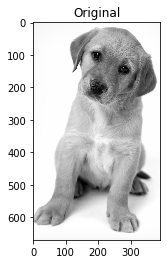

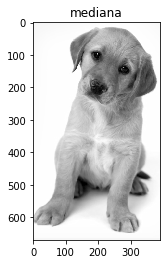

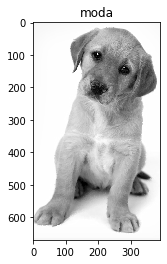

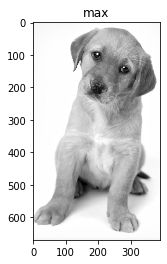

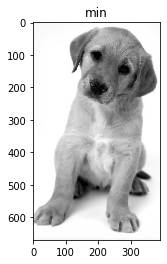

In [3]:
from skimage.io import imread,imsave, imshow
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
import random
import math
import numpy as np
from collections import Counter
from skimage.util import random_noise

def aplicaFiltro(imagem, filtroLinhas, filtroColunas, filtro):
    
    l = int(filtroLinhas/2)
    c = int(filtroColunas/2)
    
    new_img = np.zeros((filtroLinhas//2*2 + imagem.shape[0], filtroColunas//2*2 + imagem.shape[1]))
    new_img[filtroLinhas//2:imagem.shape[0]+1, filtroColunas//2:imagem.shape[1]+1] = imagem.copy()
    
    img = np.zeros([new_img.shape[0], new_img.shape[1]])
    
    for i in range(l, new_img.shape[0]-l):
        for j in range(c, new_img.shape[1]-c):
            
            corte = new_img[i-l:i+l+1, j-c:j+c+1]
            kernel = np.asarray(corte).reshape(-1)
            
            if(filtro == 'mediana'):
                img[i][j] = np.median(corte)
                    
            elif(filtro == 'moda'):
                data = Counter(kernel) 
                get_mode = dict(data) 
                mode = [k for k, v in get_mode.items() if v == max(list(data.values()))]
                img[i][j] = mode[0]
                
            elif(filtro == 'max'):
                img[i][j] = kernel.max()
                
            elif(filtro == 'min'):
                img[i][j] = kernel.min()
                
            elif(filtro == 'media'):
                img[i][j] = kernel.mean()
            
    return img[filtroLinhas//2:imagem.shape[0]+1, filtroColunas//2:imagem.shape[1]+1]

def normalizar(img):
    img_max = img.max()
    img_min = img.min()
    
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            n = (img[i][j] - img_min)/(img_max - img_min )
            img[i][j] = n*256
            
    return img

def filtrosNaoLineares(imagem, filtroLinhas, filtroColunas, tipo):
    if(len(imagem.shape) == 3):
        red = imagem[:, :, 0]
        green = imagem[:, :, 1]
        blue = imagem[:, :, 2]

        resultR = aplicaFiltro(red, filtroLinhas, filtroColunas, tipo)
        resultG = aplicaFiltro(green, filtroLinhas, filtroColunas, tipo)
        resultB = aplicaFiltro(blue, filtroLinhas, filtroColunas, tipo)

        rgbArray = np.zeros((imagem.shape[0],imagem.shape[1],3),'uint8')
        rgbArray[:,:, 0] = normalizar(resultR)
        rgbArray[:,:, 1] = normalizar(resultG)
        rgbArray[:,:, 2] = normalizar(resultB)

        imagem_processada = rgbArray#np.dstack([resultR, resultG, resultB]).reshape(imagem.shape)
    else:
        filterNotLinear = aplicaFiltro(imagem, filtroLinhas, filtroColunas, tipo)
        imagem_processada = normalizar(filterNotLinear)

    return imagem_processada

def main2():
    img = imread('dog.jpeg')
    copia = img.copy()

    img = rgb2gray(img)
    copia = rgb2gray(copia)*255
    
    #img = random_noise(img, 's&p')
    filtro = ['mediana', 'moda', 'max', 'min']
    
    plt.figure()
    plt.title('Original')
    plt.imshow(img, cmap='gray')
    
    for i in range(4):
        result = filtrosNaoLineares(img, 3, 3, filtro[i])
        plt.figure()
        plt.title(filtro[i])
        plt.imshow(result, cmap='gray')

main2()

3) Utilizando o algoritmo da questão 1, aplique o filtro Laplaciano em uma imagem em tons de cinza. Utilize o filtro para realçar a imagem utilizada. O que aconteceu com a imagem após a aplicação do realce?

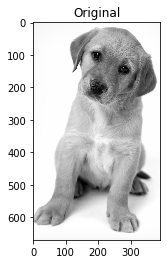

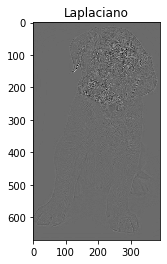

In [4]:
img = imread('dog.jpeg')
copia = img.copy()
filtro = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])

img = rgb2gray(img)*255
copia = rgb2gray(copia)*255

result = convolucao(img, filtro, 'ignore')

plt.figure()
plt.title('Original')
plt.imshow(copia, cmap='gray')
plt.figure()
plt.title('Laplaciano')
plt.imshow(result, cmap='gray')

4) Implemente uma máscara de nitidez e uma filtragem high-boost utilizando o algoritmo da questão 1. Explique os passos de ambas implementações e diferencie o resultado das mesmas. Utilize valores de 0 < k < 2.

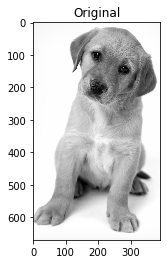

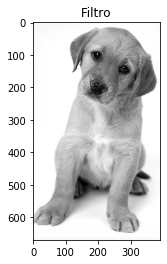

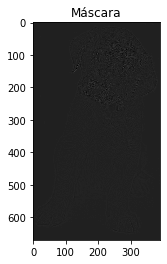

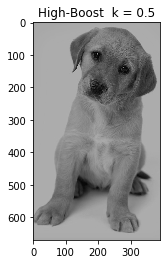

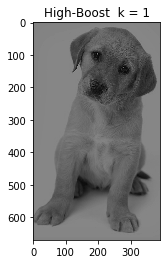

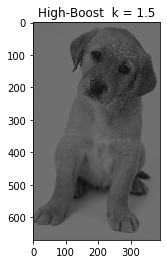

In [5]:
img = imread('dog.jpeg')
copia = img.copy()
filtro = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]])

img = rgb2gray(img)*255
copia = rgb2gray(copia)*255

result = convolucao(img, filtro, 'ignore')
mascara = copia - result
high_boost = img + 0.5 * mascara

plt.figure()
plt.title('Original')
plt.imshow(copia, cmap='gray')
plt.figure()
plt.title('Filtro')
plt.imshow(result, cmap='gray')
plt.figure()
plt.title('Máscara')
plt.imshow(mascara, cmap='gray')

plt.figure()
plt.title('High-Boost  k = 0.5')
plt.imshow(high_boost, cmap='gray')

high_boost = img + 1 * mascara
plt.figure()
plt.title('High-Boost  k = 1')
plt.imshow(high_boost, cmap='gray')

high_boost = img + 1.5 * mascara
plt.figure()
plt.title('High-Boost  k = 1.5')
plt.imshow(high_boost, cmap='gray')

5) Aplique os filtros da média e mediana em uma imagem ruidosa. O que aconteceu? Qual tipo de ruído existia na imagem?

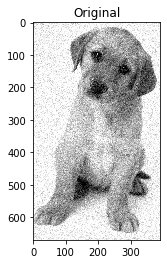

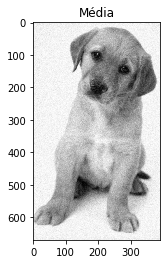

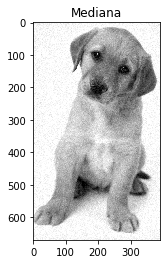

In [6]:
img = imread('dog.jpeg')

img = rgb2gray(img)
img = random_noise(img)
copia = img.copy()

media = filtrosNaoLineares(img, 3, 3, 'media')
mediana = filtrosNaoLineares(img, 3, 3, 'mediana')

plt.figure()
plt.title('Original')
plt.imshow(copia, cmap='gray')
plt.figure()
plt.title('Média')
plt.imshow(media, cmap='gray')
plt.figure()
plt.title('Mediana')
plt.imshow(mediana, cmap='gray')